## SMS Spam Classification
- Classification of SMS as Spam or Not 

## Importing Datasets

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.tree import DecisionTreeClassifier 
from nltk.corpus import stopwords
stop_words = set(stopwords.words("english"))
import seaborn as sns
import nltk
import re

In [2]:
msg = pd.read_csv('spam.csv',encoding='latin-1')
msg.head(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


In [3]:
remove = msg.iloc[:, [False, False, True, True, True]]
msg.drop(labels = remove, axis = 1, inplace=True)

In [4]:
msg.rename(columns={'v1':'Labels', 'v2':'Messages'}, inplace=True)

In [5]:
msg.head()

,Labels,Messages
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## EDA

In [6]:
msg['Labels'].value_counts() #Shows that 4825 messages and legitimate and remaining 747 are spam

ham     4825
spam     747
Name: Labels, dtype: int64

In [7]:
words = ''
for val in msg['Messages']:
    text = val.lower()
    tokens = nltk.word_tokenize(text)
    for w in tokens:
        words = words + w + ' '

In [8]:
wordcloud = WordCloud(width=300, height=150, background_color ='white').generate(words)

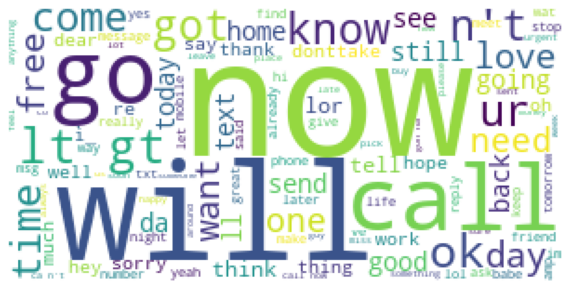

In [9]:
plt.figure( figsize=(10,8), facecolor='none')
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## Data Cleaning and Preprocessing

In [10]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
corpus = []

#### Removing Characters , lower case every message, spliting the message into words, lemmatizing i.e. converting each word into its root form, removing stopwords and combining the message back to its normal message.

In [11]:
for i in range(len(msg)):
    message = re.sub('[^a-zA-Z]', ' ', msg['Messages'][i])
    message = message.lower()
    message = message.split()
    message = [lemmatizer.lemmatize(word) for word in message if not word in stopwords.words('english')]
    message = ' '.join(message)
    corpus.append(message)

#### Converting words to vectors using CountVectorizer

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 5000)
X = cv.fit_transform(corpus).toarray()

#### Mapping Categorical Values

In [15]:
Y = msg['Labels'].map({'ham': '1', 'spam':'0'})  # Mapping ham=1 and spam=0

## Splitting and Model Building 

In [16]:
from sklearn.model_selection import train_test_split
X_train , X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [17]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(4179, 5000)
(1393, 5000)
(4179,)
(1393,)


### Model Building

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

In [34]:
svc_model = SVC()
knc_model = KNeighborsClassifier(n_neighbors=10)
mnb_model = MultinomialNB()
dtc_model = DecisionTreeClassifier()
lrc_model = LogisticRegression()
rfc_model = RandomForestClassifier()

In [20]:
clfs = {'SVC' : svc_model,'KN' : knc_model, 'NB': mnb_model, 'DT': dtc_model, 'LR': lrc_model, 'RF': rfc_model}

In [21]:
def train(clf, features, targets):    
    clf.fit(features, targets)

def predict(clf, features):
    return (clf.predict(features))

In [35]:
from sklearn.metrics import accuracy_score
pred_scores = []
for k,v in clfs.items():
    train(v, X_train, Y_train)
    pred = predict(v, X_test)
    pred_scores.append((k, [accuracy_score(Y_test , pred)]))

In [36]:
pred_scores

[('SVC', [0.9224694903086863]),
 ('KN', [0.8585786073223259]),
 ('NB', [0.9820531227566404]),
 ('DT', [0.9698492462311558]),
 ('LR', [0.9755922469490309]),
 ('RF', [0.9741564967695621])]

In [32]:
text = ["Free tickets to Barcelona vs Real Madrid from me"]
integers = cv.transform(text)

In [30]:
def find(i):
    if i == 1:
        print ("Message is SPAM")
    else:
        print ("Message is NOT Spam")

In [33]:
i = mnb_model.predict(integers)[0]
find(i)

Message is NOT Spam
